In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# # Define the sensors and input folder
# sensors = ['2P02', '2T01', '2T02', '2T03', '2T04']
# input_folder = '../Data_target/projectroom/'
# 
# # Initialize an empty list to store DataFrames
# dfs = []
# 
# # Loop through each sensor
# for sensor in sensors:
#     # Read the Excel file
#     df = pd.read_excel(f'{input_folder}{sensor}_processed.xlsx')
#     
#     # Ensure the 'Date' column is in datetime format
#     df['Date'] = pd.to_datetime(df['Date'])
#     
#     # Align 'Date' to the nearest 5-minute interval
#     df['Date'] = df['Date'].dt.floor('5T')
#     
#     # Rename the 'Count' column to include the sensor name
#     df = df.rename(columns={'Count': f'Count_{sensor}'})
#     
#     # Append the DataFrame to the list
#     dfs.append(df)
# 
# # Merge all DataFrames on the 'Date' column
# merged_df = dfs[0]
# for df in dfs[1:]:
#     merged_df = pd.merge(merged_df, df, on='Date', how='outer')
# 
# # Sort by Date
# merged_df = merged_df.sort_values('Date').reset_index(drop=True)
# 
# # Fill missing values with NaN
# merged_df = merged_df.fillna(np.nan)
# t_sensor_columns = [f'Count_{sensor}' for sensor in sensors if sensor.startswith('2T')]
# 
# # Add the 'occupancy' column
# merged_df['occupancy'] = (merged_df[t_sensor_columns].notna() & (merged_df[t_sensor_columns] != 0)).sum(axis=1)
# 
# # Save the merged DataFrame to a new Excel file
# output_file = '../Data_target/projectroom/merged_sensors_data.xlsx'
# merged_df.to_excel(output_file, index=False)
# 
# print(f'Merged data saved to {output_file}')


In [49]:
df = pd.read_excel('../Data_target/projectroom/merged_sensors_data.xlsx')

In [50]:
df['occupancy'].value_counts()
df = df[(df['Date'] >= '2024-06-15') & (df['Date'] < '2024-06-16')]


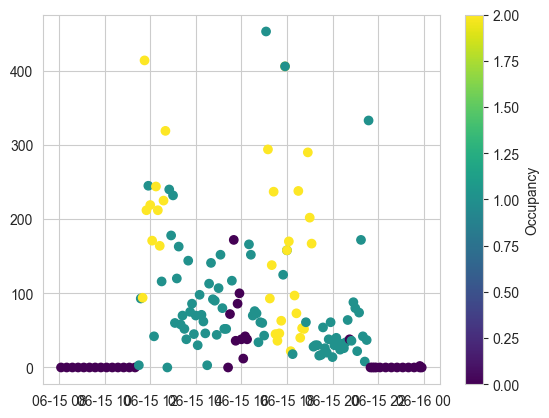

In [51]:
sc = plt.scatter(df['Date'], df['Count_2P02'], c=df['occupancy'], cmap='viridis')
plt.colorbar(sc, label='Occupancy')

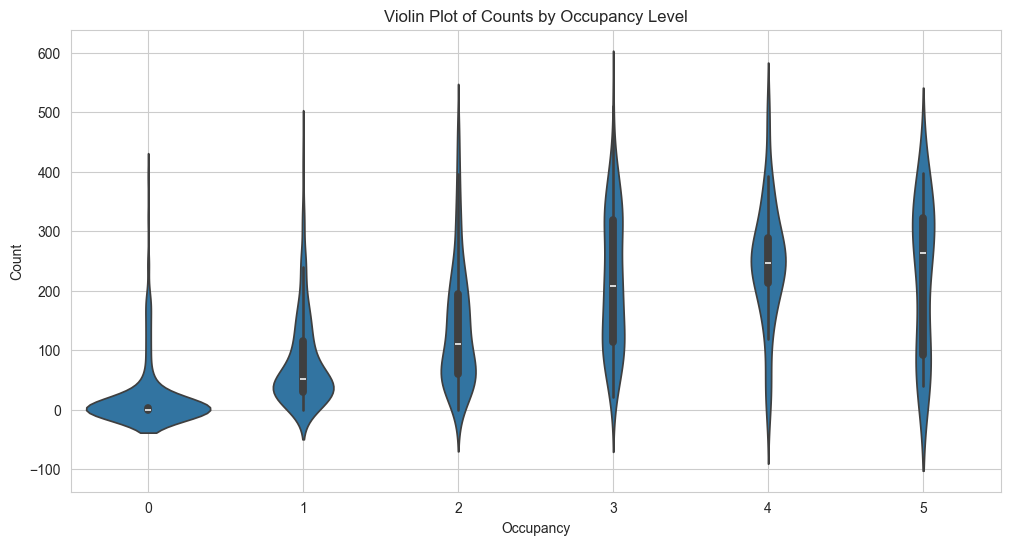

In [52]:
import seaborn as sns
df = pd.read_excel('../Data_target/merged_sensors_data_modified.xlsx')
plt.figure(figsize=(12, 6))
sns.violinplot(x='occupancy', y='Count_2P02', data=df)
plt.xlabel('Occupancy')
plt.ylabel('Count')
plt.title('Violin Plot of Counts by Occupancy Level')
plt.grid(True)
plt.show()

In [54]:
df = pd.read_excel('../Data_target/merged_sensors_data_modified.xlsx')
df = df[df['Count_2P02'].notna()]   
X = df[['Count_2P02']]
y = df['occupancy']
print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(919, 1) (919,)
(735, 1) (184, 1) (735,) (184,)


In [55]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

Mean Squared Error: 0.9223019688067744
R^2 Score: 0.34233123157770484


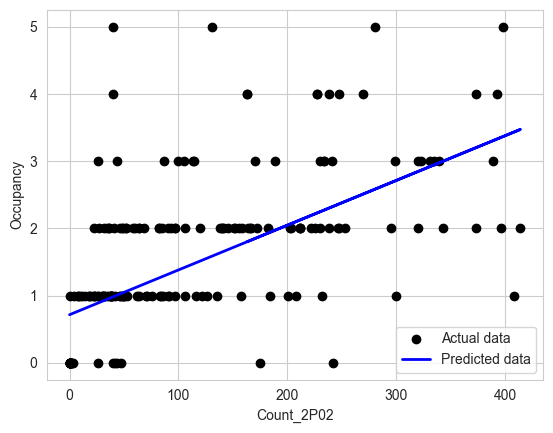

In [56]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

plt.scatter(X_test, y_test, color='black', label='Actual data')
plt.plot(X_test, y_pred, color='blue', linewidth=2, label='Predicted data')
plt.xlabel('Count_2P02')
plt.ylabel('Occupancy')
plt.legend()
plt.show()

In [57]:

new_count = pd.DataFrame({'Count_2P02': [150]})
predicted_occupancy = model.predict(new_count)
print(f'Predicted occupancy for count 150: {predicted_occupancy[0]}')


Predicted occupancy for count 150: 1.7145994906857989


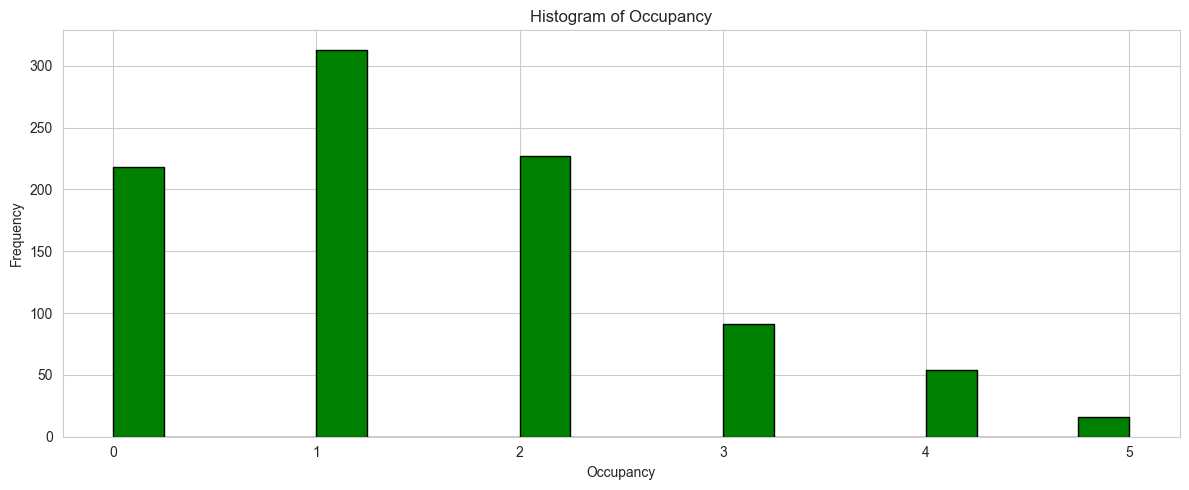

In [58]:

plt.figure(figsize=(12, 5))

plt.hist(df['occupancy'], bins=20, color='green', edgecolor='black')
plt.title('Histogram of Occupancy')
plt.xlabel('Occupancy')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


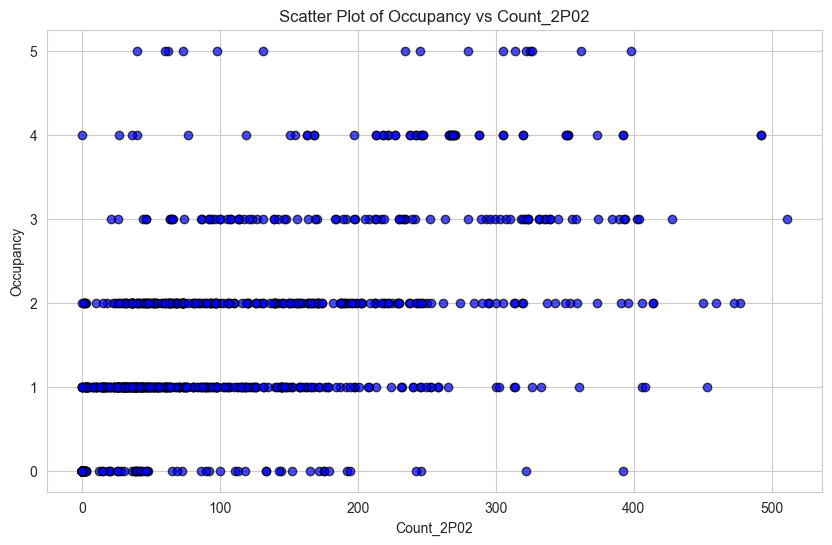

In [59]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Count_2P02'], df['occupancy'], color='blue', edgecolor='black', alpha=0.7)
plt.title('Scatter Plot of Occupancy vs Count_2P02')
plt.xlabel('Count_2P02')
plt.ylabel('Occupancy')
plt.grid(True)
plt.show()

In [66]:
for x in df['occupancy'].unique():
    df_temp = df[df['occupancy'] == x]
    mean = df_temp['Count_2P02'].mean()
    std = df_temp['Count_2P02'].std()
    print(f'Count {x} has a mean of{mean} and a standard deviation of {std}, meaning this is the range {mean - std} to {mean + std}.')


Count 0 has a mean of22.256880733944953 and a standard deviation of 57.09171272710903, meaning this is the range -34.83483199316407 to 79.34859346105398.
Count 1 has a mean of81.51757188498402 and a standard deviation of 79.0978004117864, meaning this is the range 2.4197714731976276 to 160.61537229677043.
Count 2 has a mean of139.04845814977975 and a standard deviation of 104.0307235711029, meaning this is the range 35.01773457867685 to 243.07918172088264.
Count 3 has a mean of214.72527472527472 and a standard deviation of 113.55841041645738, meaning this is the range 101.16686430881734 to 328.2836851417321.
Count 5 has a mean of223.4375 and a standard deviation of 124.41434469813626, meaning this is the range 99.02315530186374 to 347.85184469813623.
Count 4 has a mean of244.85185185185185 and a standard deviation of 101.11331349687468, meaning this is the range 143.73853835497715 to 345.96516534872654.


Count 0 has a mean of 22.256880733944953 and a standard deviation of 57.09171272710903, meaning this is the range -34.83483199316407 to 79.34859346105398.
Count 1 has a mean of 81.51757188498402 and a standard deviation of 79.0978004117864, meaning this is the range 2.4197714731976276 to 160.61537229677043.
Count 2 has a mean of 139.04845814977975 and a standard deviation of 104.0307235711029, meaning this is the range 35.01773457867685 to 243.07918172088264.
Count 3 has a mean of 214.72527472527472 and a standard deviation of 113.55841041645738, meaning this is the range 101.16686430881734 to 328.2836851417321.
Count 5 has a mean of 223.4375 and a standard deviation of 124.41434469813626, meaning this is the range 99.02315530186374 to 347.85184469813623.
Count 4 has a mean of 244.85185185185185 and a standard deviation of 101.11331349687468, meaning this is the range 143.73853835497715 to 345.96516534872654.


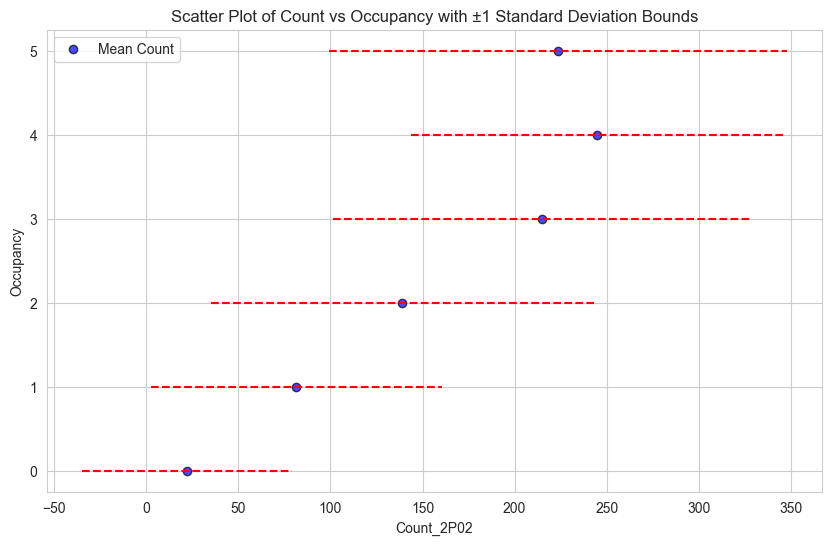

In [67]:
means = []
stds = []
occupancies = df['occupancy'].unique()

for x in occupancies:
    df_temp = df[df['occupancy'] == x]
    mean = df_temp['Count_2P02'].mean()
    std = df_temp['Count_2P02'].std()
    means.append(mean)
    stds.append(std)
    print(f'Count {x} has a mean of {mean} and a standard deviation of {std}, meaning this is the range {mean - std} to {mean + std}.')

stats_df = pd.DataFrame({
    'occupancy': occupancies,
    'mean': means,
    'std': stds
})

stats_df['lower_bound'] = stats_df['mean'] - stats_df['std']
stats_df['upper_bound'] = stats_df['mean'] + stats_df['std']

plt.figure(figsize=(10, 6))

plt.scatter(stats_df['mean'], stats_df['occupancy'], color='blue', edgecolor='black', alpha=0.7, label='Mean Count')

for i in range(len(stats_df)):
    plt.plot([stats_df['lower_bound'][i], stats_df['upper_bound'][i]], [stats_df['occupancy'][i], stats_df['occupancy'][i]], color='red', linestyle='--')

plt.title('Scatter Plot of Count vs Occupancy with ±1 Standard Deviation Bounds')
plt.xlabel('Count_2P02')
plt.ylabel('Occupancy')
plt.legend()
plt.grid(True)
plt.show()